In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 27.0MB/s 
     |████████████████████████████████| 9.5MB 34.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from pmdarima.arima.utils import ndiffs

In [3]:
px

<module 'plotly.express' from '/usr/local/lib/python3.7/dist-packages/plotly/express/__init__.py'>

In [4]:
#importing the dataset
covid_confirmed = pd.read_csv("project_dataset.confirmed_reduce.csv")

In [5]:
covid_death = pd.read_csv("project_dataset_death_reduce.csv")

In [6]:
covid_confirmed

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,...,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",4239,4268,4305,4336,4546,4645,4705,4770,4847,4879,4902,4970,4998,5075,5103,5154,5184,5198,5227,5257,5270,5327,5358,5376,5407,5440,5499,5554,5596,...,6897,6904,6907,6909,6910,6910,6914,6914,6918,6918,6920,6920,6926,6928,6938,6971,7001,7005,7010,7015,7017,7049,7106,7113,7118,7118,7126,7135,7141,7142,7142,7142,7142,7150,7161,7172,7186,7186,7186,7206
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",13823,13955,14064,14187,14440,14656,14845,15052,15202,15327,15417,15572,15701,15841,16002,16176,16251,16346,16513,16653,16798,16981,17128,17256,17333,17496,17629,17779,17922,...,20921,20941,20966,20983,20993,20993,21035,21093,21107,21123,21131,21135,21154,21170,21191,21290,21392,21411,21422,21444,21467,21489,21511,21535,21546,21554,21578,21593,21606,21620,21620,21620,21620,21661,21674,21684,21698,21698,21698,21724
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1517,1528,1530,1533,1575,1597,1614,1634,1648,1658,1663,1679,1685,1696,1712,1723,1729,1730,1738,1760,1778,1793,1805,1827,1834,1882,1898,1920,1931,...,2299,2300,2302,2302,2302,2302,2307,2307,2307,2307,2308,2308,2310,2314,2317,2319,2320,2320,2320,2322,2324,2326,2327,2328,2328,2328,2331,2331,2333,2334,2334,2334,2334,2337,2340,2343,2342,2342,2342,2343
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1854,1863,1882,1885,1923,1944,1981,2015,2038,2051,2060,2090,2109,2113,2130,2144,2151,2162,2170,2188,2198,2212,2223,2223,2229,2247,2261,2271,2284,...,2593,2594,2596,2596,2597,2597,2604,2604,2604,2605,2607,2607,2609,2612,2615,2630,2645,2647,2648,2651,2652,2656,2657,2656,2658,2659,2660,2662,2666,2664,2664,2664,2664,2665,2665,2665,2666,2666,2666,2667
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",4693,4729,4746,4771,4849,4898,4957,5018,5047,5066,5080,5134,5170,5219,5264,5292,5304,5308,5320,5376,5411,5439,5462,5473,5485,5517,5568,5612,5655,...,6607,6613,6616,6619,6621,6621,6635,6645,6651,6656,6660,6661,6678,6680,6694,6750,6771,6773,6776,6794,6808,6816,6826,6829,6832,6832,6847,6856,6862,6864,6864,6864,6864,6887,6889,6894,6906,6906,6906,6916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",2138,2145,2159,2199,2216,2239,2260,2346,2348,2353,2447,2497,2502,2579,2605,2614,2685,2753,2769,2788,2847,2870,2870,2931,2981,2993,3020,3028,3078,...,3730,3732,3732,3732,3739,3741,3744,3753,3751,3751,3751,3755,3758,3760,3762,3765,3765,3765,3769,3772,3770,3775,3776,3776,3776,3780,3780,3781,3781,3784,3784,3784,3784,3785,3785,3785,3787,3787,3787,3789
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",1558,1569,1570,1589,1597,1618,1668,1693,1693,1708,1744,1764,1774,1794,1806,1813,1817,1833,1843,1852,1874,1887,1887,1900,1913,1925,1948,1957,1959,...,2181,2183,2183,2183,2195,2204,2209,2211,2217,2217,2217,2229,2232,2234,2237,2239,2239,2239,2244,2249,2250,

In [7]:
covid_death

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,...,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,50,50,50,50,50,50,50,50,53,54,55,55,55,55,55,55,55,55,55,55,61,61,62,62,62,65,67,69,...,107,107,107,107,107,107,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,109,109,110,110,110,110,110,110,110,110,110,110,111,111,111,112,112,112,113
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,169,169,169,169,169,171,171,171,173,173,173,175,175,177,179,182,182,182,183,184,188,188,189,189,189,216,217,225,...,305,305,306,306,306,306,307,307,307,308,308,308,308,309,309,309,310,310,310,310,310,310,310,310,310,310,310,310,310,311,311,311,311,311,311,312,312,312,312,312
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,33,33,33,33,33,35,35,35,35,35,35,35,35,36,36,36,36,36,36,36,36,37,38,38,38,40,40,40,...,56,56,56,56,56,56,56,57,57,57,57,57,57,56,56,56,56,56,56,56,56,58,58,58,58,58,58,58,58,59,59,59,59,59,59,59,59,59,59,59
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,46,46,46,46,46,48,48,48,48,48,48,48,48,47,47,47,47,47,47,47,48,48,48,48,48,51,51,51,...,63,63,63,63,63,63,63,63,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,63,63,63,63,63,67,72,75,77,77,77,79,80,80,83,83,83,83,83,83,86,86,86,86,86,94,95,98,...,135,135,135,135,135,135,136,136,137,137,137,137,137,137,137,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,6,6,6,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226,7,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,9,9,10,10,10,12,12,12,12,12,12,12,...,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805,19,19,19,19,21,21,21,21,21,21,21,23,23,23,23,23,23,23,24,24,24,25,25,25,25,25,25,25,...,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26


In [8]:
# I will drop the column dont we dont need for the analysis: for this project the column of interest are the Province_ state, date of confirmed case
covid_confirmed = covid_confirmed.drop(columns= ['UID',	'iso2',	'iso3',	'code3',	'FIPS',	'Admin2', 'Country_Region', 'Lat',	'Long_',	'Combined_Key'])

In [9]:
covid_confirmed

,Province_State,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,...,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21
0,Alabama,4239,4268,4305,4336,4546,4645,4705,4770,4847,4879,4902,4970,4998,5075,5103,5154,5184,5198,5227,5257,5270,5327,5358,5376,5407,5440,5499,5554,5596,5596,5669,5683,5723,5753,5811,5824,5856,5869,5881,...,6897,6904,6907,6909,6910,6910,6914,6914,6918,6918,6920,6920,6926,6928,6938,6971,7001,7005,7010,7015,7017,7049,7106,7113,7118,7118,7126,7135,7141,7142,7142,7142,7142,7150,7161,7172,7186,7186,7186,7206
1,Alabama,13823,13955,14064,14187,14440,14656,14845,15052,15202,15327,15417,15572,15701,15841,16002,16176,16251,16346,16513,16653,16798,16981,17128,17256,17333,17496,17629,17779,17922,17922,18126,18211,18344,18418,18494,18568,18668,18723,18763,...,20921,20941,20966,20983,20993,20993,21035,21093,21107,21123,21131,21135,21154,21170,21191,21290,21392,21411,21422,21444,21467,21489,21511,21535,21546,21554,21578,21593,21606,21620,21620,21620,21620,21661,21674,21684,21698,21698,21698,21724
2,Alabama,1517,1528,1530,1533,1575,1597,1614,1634,1648,1658,1663,1679,1685,1696,1712,1723,1729,1730,1738,1760,1778,1793,1805,1827,1834,1882,1898,1920,1931,1931,1951,1956,1966,1981,1989,1994,2002,2008,2008,...,2299,2300,2302,2302,2302,2302,2307,2307,2307,2307,2308,2308,2310,2314,2317,2319,2320,2320,2320,2322,2324,2326,2327,2328,2328,2328,2331,2331,2333,2334,2334,2334,2334,2337,2340,2343,2342,2342,2342,2343
3,Alabama,1854,1863,1882,1885,1923,1944,1981,2015,2038,2051,2060,2090,2109,2113,2130,2144,2151,2162,2170,2188,2198,2212,2223,2223,2229,2247,2261,2271,2284,2284,2307,2309,2319,2321,2327,2331,2334,2339,2346,...,2593,2594,2596,2596,2597,2597,2604,2604,2604,2605,2607,2607,2609,2612,2615,2630,2645,2647,2648,2651,2652,2656,2657,2656,2658,2659,2660,2662,2666,2664,2664,2664,2664,2665,2665,2665,2666,2666,2666,2667
4,Alabama,4693,4729,4746,4771,4849,4898,4957,5018,5047,5066,5080,5134,5170,5219,5264,5292,5304,5308,5320,5376,5411,5439,5462,5473,5485,5517,5568,5612,5655,5655,5713,5720,5745,5768,5842,5871,5908,5915,5920,...,6607,6613,6616,6619,6621,6621,6635,6645,6651,6656,6660,6661,6678,6680,6694,6750,6771,6773,6776,6794,6808,6816,6826,6829,6832,6832,6847,6856,6862,6864,6864,6864,6864,6887,6889,6894,6906,6906,6906,6916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,2138,2145,2159,2199,2216,2239,2260,2346,2348,2353,2447,2497,2502,2579,2605,2614,2685,2753,2769,2788,2847,2870,2870,2931,2981,2993,3020,3028,3078,3078,3116,3146,3151,3161,3199,3219,3233,3238,3257,...,3730,3732,3732,3732,3739,3741,3744,3753,3751,3751,3751,3755,3758,3760,3762,3765,3765,3765,3769,3772,3770,3775,3776,3776,3776,3780,3780,3781,3781,3784,3784,3784,3784,3785,3785,3785,3787,3787,3787,3789
3338,Wyoming,1558,1569,1570,1589,1597,1618,1668,1693,1693,1708,1744,1764,1774,1794,1806,1813,1817,1833,1843,1852,1874,1887,1887,1900,1913,1925,1948,1957,1959,1960,1963,1968,1975,1981,1984,1984,1984,1983,1988,...,2181,2183,2183,2183,2195,2204,2209,2211,2217,2217,2217,2229,2232,2234,2237,2239,2239,2239,2244,2249,2250,2251,2246,2246,2246,2252,2261,2263,2264,2266,2266,2266,2266,2272,2279,2287,2289,2289,2289,2290
3339,Wyoming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,

In [10]:
#drop column
covid_death = covid_death.drop(columns= ['UID',	'iso2',	'iso3',	'code3',	'FIPS',	'Admin2', 'Country_Region', 'Population', 'Lat',	'Long_',	'Combined_Key'])

In [11]:
covid_death

,Province_State,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,...,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21
0,Alabama,50,50,50,50,50,50,50,50,53,54,55,55,55,55,55,55,55,55,55,55,61,61,62,62,62,65,67,69,69,69,69,69,70,71,74,76,77,77,77,...,107,107,107,107,107,107,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,109,109,110,110,110,110,110,110,110,110,110,110,111,111,111,112,112,112,113
1,Alabama,169,169,169,169,169,171,171,171,173,173,173,175,175,177,179,182,182,182,183,184,188,188,189,189,189,216,217,225,224,224,224,224,228,228,233,234,227,227,227,...,305,305,306,306,306,306,307,307,307,308,308,308,308,309,309,309,310,310,310,310,310,310,310,310,310,310,310,310,310,311,311,311,311,311,311,312,312,312,312,312
2,Alabama,33,33,33,33,33,35,35,35,35,35,35,35,35,36,36,36,36,36,36,36,36,37,38,38,38,40,40,40,40,40,40,40,40,42,43,44,45,45,45,...,56,56,56,56,56,56,56,57,57,57,57,57,57,56,56,56,56,56,56,56,56,58,58,58,58,58,58,58,58,59,59,59,59,59,59,59,59,59,59,59
3,Alabama,46,46,46,46,46,48,48,48,48,48,48,48,48,47,47,47,47,47,47,47,48,48,48,48,48,51,51,51,51,51,52,52,52,52,52,52,53,53,53,...,63,63,63,63,63,63,63,63,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
4,Alabama,63,63,63,63,63,67,72,75,77,77,77,79,80,80,83,83,83,83,83,83,86,86,86,86,86,94,95,98,98,98,100,100,101,105,109,111,112,112,112,...,135,135,135,135,135,135,136,136,137,137,137,137,137,137,137,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,6,6,6,6,6,6,6,7,7,7,7,7,7,7,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
3338,Wyoming,7,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,9,9,10,10,10,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
3339,Wyoming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
3340,Wyoming,19,19,19,19,21,21,21,21,21,21,21,23,23,23,23,23,23,23,24,24,24,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26


In [12]:
#It is not to pratical to have date as column instead we want them as row in their commun column name called Date
# we will merged all the row from the same Province, aggregate them , sum them and we will finally tranpose the data frame
covid_confirmed = covid_confirmed.groupby(by='Province_State').aggregate(np.sum).T
covid_death = covid_death.groupby(by='Province_State').aggregate(np.sum).T

In [13]:
covid_confirmed


Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/1/21,365747,47019,0,530267,229442,2365024,337161,185708,58064,49,29252,1323315,677589,103,7326,22397,141077,963389,517773,282980,230108,265261,315275,24902,280219,375178,528621,415302,218386,445019,81555,167716,227046,45932,535043,144142,995816,539545,92770,122,700380,291209,113909,653260,77054,87949,307507,99164,586802,1782956,276612,7412,2036,354766,246752,87820,522523,44409
1/2/21,369458,47821,0,539150,231442,2415246,339172,190120,58873,49,29509,1354833,685122,103,7326,22448,142199,975352,523090,283895,230119,273970,315275,25245,283171,384181,538121,417832,220277,448387,81944,168262,228871,46614,541202,145379,1011665,558437,92891,122,714673,296343,116348,661901,77932,87949,312718,99829,604132,1801181,281654,7689,2041,358755,246752,89327,523652,44573
1/3/21,371934,48118,0,556384,233475,2452262,341250,190120,59484,49,29764,1365436,690900,103,7326,22560,142507,979821,526071,284715,230119,276825,321058,25592,285319,387662,538121,420544,222061,451605,82381,169000,231614,47376,545450,146394,1023897,564924,93041,122,721481,304375,117745,666341,78169,87949,321669,100532,608297,1816886,283473,7793,2042,363765,255396,91058,526245,44875
1/4/21,374095,48382,0,561542,234781,2490518,343435,194636,60333,49,29904,1376692,696063,103,7344,22602,143305,984880,529688,286356,234069,279142,322181,25967,287802,392568,543611,423688,223677,454015,82664,169585,233032,47870,547247,147315,1035139,570111,93240,122,727423,307091,118453,671190,78805,92708,325472,100643,612250,1831146,285633,7873,2055,367536,256435,91886,527871,45257
1/5/21,379593,48582,0,567474,238888,2529480,346893,196968,61100,49,30166,1392123,706154,103,7357,22757,144843,991719,533083,288298,233901,280835,326648,26565,289758,397202,546642,425261,225444,458230,83378,171033,235455,48662,554400,148499,1048281,575396,93494,122,735003,308600,119488,680080,79319,93852,328073,101076,617649,1864173,288951,8038,2083,371913,258767,93162,531890,45569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/3/21,545028,70408,0,882691,341889,3792962,545002,347748,108957,49,49041,2329867,1125017,103,8193,36402,192630,1383647,745690,371765,315767,459540,472617,67986,460194,707523,993952,601881,318048,607774,112129,223517,325031,98840,1017044,203330,2103768,1003989,110098,183,1103380,453400,202247,1208879,138873,151936,593628,124242,863620,2959171,406825,24240,3512,676041,438544,162111,674939,60549
6/4/21,545585,70469,0,883037,342142,3794129,545769,347891,109005,49,49068,2329867,1125512,103,8204,36471,192795,1384283,746135,371862,316059,460049,472981,68058,460339,707723,994506,602134,318189,608463,112260,223558,325392,98877,1017118,203472,2104539,1004669,110151,183,1104001,453552,202680,1209492,138949,151992,593727,124261,863840,2961257,407113,24252,3512,676300,439263,162232,675150,60628
6/5/21,545585,70469,0,883314,342345,3794927,546500,347891,109070,49,49068,2332867,1125854,103,8204,36535,192795,1384823,746554,371956,316059,460412,472981,68155,460471,707940,994935,602428,318189,608970,112260,223558,325392,98877,1017695,203472,2105375,1004669,110178,183,1104380,453552,202995,1209894,139004,151992,593948,124261,863840,2962395,407419,24252,3512,676586,440057,162232,675150,60628
6/6/21,545585,70469,0,883821,342433,3795580,

In [14]:
covid_death.head()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/1/21,4872,206,0,9015,3711,26504,4873,5995,1065,0,788,21673,10958,3,122,289,1436,17978,9468,3898,2892,2623,7488,352,5942,12423,13018,5382,4816,5747,961,1668,3143,759,19160,2502,38155,6748,1316,2,13728,2489,1477,16245,1521,1944,5296,1488,6907,28359,1269,136,23,5081,3461,1361,5254,438
1/2/21,4872,215,0,9061,3729,26696,4912,6099,1072,0,792,21890,10960,3,122,289,1448,18217,9562,3946,2893,2698,7488,358,5967,12502,13306,5436,4840,5751,971,1669,3148,769,19187,2534,38273,6892,1317,2,13880,2527,1492,16273,1526,1957,5385,1501,6970,28442,1294,139,23,5117,3461,1373,5256,438
1/3/21,4873,215,0,9061,3749,26788,4934,6099,1080,0,794,21987,10964,3,122,289,1448,18322,9625,3946,2893,2723,7537,359,5994,12610,13306,5489,4871,5770,972,1672,3180,780,19208,2551,38415,6910,1317,2,14014,2547,1500,16331,1545,1974,5469,1513,7025,28496,1301,140,23,5124,3459,1376,5261,438
1/4/21,4878,218,0,9064,3800,27160,4944,6168,1085,0,797,22090,10971,3,122,289,1459,18412,9735,3992,2911,2749,7585,361,6027,12671,13391,5502,4884,5772,975,1682,3206,781,19225,2574,38599,6941,1319,2,14178,2552,1506,16432,1555,1992,5484,1513,7168,28570,1305,144,24,5132,3482,1396,5269,438
1/5/21,4886,218,0,9317,3836,27684,4991,6192,1093,0,801,22188,11072,3,123,289,1471,18562,9800,3999,3006,2772,7635,369,6082,12734,13608,5520,4975,5987,1005,1692,3235,792,19382,2594,38743,6996,1336,2,14313,2571,1550,16631,1562,2005,5498,1513,7267,28808,1312,149,24,5191,3541,1442,5366,464


In [15]:
# I changed the column name to date and reset tha index
covid_confirmed.index.name= "Date"
covid_confirmed = covid_confirmed.reset_index()
covid_death.index.name= "Date"
covid_death = covid_death.reset_index()

In [16]:
covid_death

Province_State,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1/1/21,4872,206,0,9015,3711,26504,4873,5995,1065,0,788,21673,10958,3,122,289,1436,17978,9468,3898,2892,2623,7488,352,5942,12423,13018,5382,4816,5747,961,1668,3143,759,19160,2502,38155,6748,1316,2,13728,2489,1477,16245,1521,1944,5296,1488,6907,28359,1269,136,23,5081,3461,1361,5254,438
1,1/2/21,4872,215,0,9061,3729,26696,4912,6099,1072,0,792,21890,10960,3,122,289,1448,18217,9562,3946,2893,2698,7488,358,5967,12502,13306,5436,4840,5751,971,1669,3148,769,19187,2534,38273,6892,1317,2,13880,2527,1492,16273,1526,1957,5385,1501,6970,28442,1294,139,23,5117,3461,1373,5256,438
2,1/3/21,4873,215,0,9061,3749,26788,4934,6099,1080,0,794,21987,10964,3,122,289,1448,18322,9625,3946,2893,2723,7537,359,5994,12610,13306,5489,4871,5770,972,1672,3180,780,19208,2551,38415,6910,1317,2,14014,2547,1500,16331,1545,1974,5469,1513,7025,28496,1301,140,23,5124,3459,1376,5261,438
3,1/4/21,4878,218,0,9064,3800,27160,4944,6168,1085,0,797,22090,10971,3,122,289,1459,18412,9735,3992,2911,2749,7585,361,6027,12671,13391,5502,4884,5772,975,1682,3206,781,19225,2574,38599,6941,1319,2,14178,2552,1506,16432,1555,1992,5484,1513,7168,28570,1305,144,24,5132,3482,1396,5269,438
4,1/5/21,4886,218,0,9317,3836,27684,4991,6192,1093,0,801,22188,11072,3,123,289,1471,18562,9800,3999,3006,2772,7635,369,6082,12734,13608,5520,4975,5987,1005,1692,3235,792,19382,2594,38743,6996,1336,2,14313,2571,1550,16631,1562,2005,5498,1513,7267,28808,1312,149,24,5191,3541,1442,5366,464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,6/3/21,11188,369,0,17653,5842,63345,6603,8245,1668,0,1136,36973,20900,3,139,501,2101,25265,13657,6065,5081,7077,10605,837,9626,17893,20485,7530,7324,9544,1627,2249,5599,1354,26253,4273,53357,13130,1546,2,19980,7316,2683,27295,2515,2715,9739,2020,12472,51633,2308,255,28,11216,5821,2807,7923,720
154,6/4/21,11198,369,0,17673,5845,63401,6611,8246,1674,0,1136,36973,20942,3,139,501,2101,25282,13661,6067,5085,7086,10615,838,9630,17903,20511,7538,7325,9554,1632,2249,5600,1355,26265,4280,53416,13151,1546,2,19980,7316,2686,27325,2516,2717,9744,2022,12476,51676,2311,256,28,11222,5836,2813,7954,720
155,6/5/21,11198,369,0,17698,5846,63441,6613,8246,1677,0,1136,36973,20986,3,139,502,2101,25314,13685,6068,5085,7091,10615,839,9639,17907,20588,7554,7325,9558,1632,2249,5600,1355,26273,4280,53429,13151,1547,2,19980,7316,2691,27343,2518,2717,9752,2022,12476,51701,2311,256,28,11229,5836,2813,7954,720
156,6/6/21,11198,369,0,17700,5846,63557,6613,8246,1677,0,1136,36973,20986,3,139,505,2101,25352,13685,6072,5085,7091,10615,839,9645,17911,20588,7558,7325,9557,1632,2249,5600,1355,26279,4280,53462,13151,1547,2,19980,7316,2694,27348,2519,2717,9754,2022,12476,51719,2311,256,28,11236,5836,2813,7954,720


In [17]:
#melt the data frame from a wide to a long format
covid_confirmed_melt = covid_confirmed.melt(id_vars='Date').copy()
covid_confirmed_melt

,Date,Province_State,value
0,1/1/21,Alabama,365747
1,1/2/21,Alabama,369458
2,1/3/21,Alabama,371934
3,1/4/21,Alabama,374095
4,1/5/21,Alabama,379593
...,...,...,...
9159,6/3/21,Wyoming,60549
9160,6/4/21,Wyoming,60628
9161,6/5/21,Wyoming,60628
9162,6/6/21,Wyoming,60628


In [18]:
# rename the column
covid_confirmed_melt.rename(columns={'value': 'Confirmed'}, inplace=True)

In [20]:
covid_confirmed_melt

,Date,Province_State,Confirmed
0,1/1/21,Alabama,365747
1,1/2/21,Alabama,369458
2,1/3/21,Alabama,371934
3,1/4/21,Alabama,374095
4,1/5/21,Alabama,379593
...,...,...,...
9159,6/3/21,Wyoming,60549
9160,6/4/21,Wyoming,60628
9161,6/5/21,Wyoming,60628
9162,6/6/21,Wyoming,60628


In [21]:
df_confirmed = covid_confirmed_melt.copy()
df_confirmed

,Date,Province_State,Confirmed
0,1/1/21,Alabama,365747
1,1/2/21,Alabama,369458
2,1/3/21,Alabama,371934
3,1/4/21,Alabama,374095
4,1/5/21,Alabama,379593
...,...,...,...
9159,6/3/21,Wyoming,60549
9160,6/4/21,Wyoming,60628
9161,6/5/21,Wyoming,60628
9162,6/6/21,Wyoming,60628


In [22]:
#The date value are string and we need to convert them to date time
df_confirmed['Date'] = pd.to_datetime(df_confirmed['Date'])
df_confirmed.set_index('Date', inplace=True)

In [23]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9164 entries, 2021-01-01 to 2021-06-07
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Province_State  9164 non-null   object
 1   Confirmed       9164 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 214.8+ KB


In [24]:
# Confirmed column is cumulative and we want them to be in a daily basis
df_confirmed['Daily_confirmed'] = df_confirmed.groupby(['Province_State'])['Confirmed'].diff()

In [25]:
df_confirmed

,Province_State,Confirmed,Daily_confirmed
Date,,,
2021-01-01,Alabama,365747,NaN
2021-01-02,Alabama,369458,3711.0
2021-01-03,Alabama,371934,2476.0
2021-01-04,Alabama,374095,2161.0
2021-01-05,Alabama,379593,5498.0
...,...,...,...
2021-06-03,Wyoming,60549,102.0
2021-06-04,Wyoming,60628,79.0
2021-06-05,Wyoming,60628,0.0


In [26]:
df_confirmed = df_confirmed.dropna() 

In [27]:
# As we want to analyse the covid-19 US we will drop the province_state column and group the confirmed case by date.
df_conf = df_confirmed.drop(columns= ['Province_State'])

In [28]:
df_conf

,Confirmed,Daily_confirmed
Date,,
2021-01-02,369458,3711.0
2021-01-03,371934,2476.0
2021-01-04,374095,2161.0
2021-01-05,379593,5498.0
2021-01-06,384184,4591.0
...,...,...
2021-06-03,60549,102.0
2021-06-04,60628,79.0
2021-06-05,60628,0.0


In [29]:
df_conf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9106 entries, 2021-01-02 to 2021-06-07
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Confirmed        9106 non-null   int64  
 1   Daily_confirmed  9106 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 213.4 KB


In [30]:
#I will merge all the row with the same date, aggregate and sum them
covid_DF = df_conf.groupby(by='Date').aggregate(np.sum)

In [31]:
covid_DF

,Confirmed,Daily_confirmed
Date,,
2021-01-02,20554622,300462.0
2021-01-03,20763475,208853.0
2021-01-04,20947480,184005.0
2021-01-05,21182522,235042.0
2021-01-06,21438159,255637.0
...,...,...
2021-06-03,33326437,19074.0
2021-06-04,33343297,16860.0
2021-06-05,33357205,13908.0


In [32]:
# drop Confirmed column as we don't need for the analysis
covid_df = covid_DF.drop(columns= ['Confirmed'])
covid_df

,Daily_confirmed
Date,
2021-01-02,300462.0
2021-01-03,208853.0
2021-01-04,184005.0
2021-01-05,235042.0
2021-01-06,255637.0
...,...
2021-06-03,19074.0
2021-06-04,16860.0
2021-06-05,13908.0


In [33]:
#Covid death data manipulation_ I applied the same step as Covid confirmed data frame
covid_death_melt = covid_death.melt(id_vars='Date').copy()
covid_death_melt

,Date,Province_State,value
0,1/1/21,Alabama,4872
1,1/2/21,Alabama,4872
2,1/3/21,Alabama,4873
3,1/4/21,Alabama,4878
4,1/5/21,Alabama,4886
...,...,...,...
9159,6/3/21,Wyoming,720
9160,6/4/21,Wyoming,720
9161,6/5/21,Wyoming,720
9162,6/6/21,Wyoming,720


In [34]:
covid_death_melt.rename(columns={'value': 'Death'}, inplace=True)


In [35]:
df_death = covid_death_melt.copy()
df_death

,Date,Province_State,Death
0,1/1/21,Alabama,4872
1,1/2/21,Alabama,4872
2,1/3/21,Alabama,4873
3,1/4/21,Alabama,4878
4,1/5/21,Alabama,4886
...,...,...,...
9159,6/3/21,Wyoming,720
9160,6/4/21,Wyoming,720
9161,6/5/21,Wyoming,720
9162,6/6/21,Wyoming,720


In [36]:
#1)The date value are string and we need to convert them to date time. 
# 2)Put the date column as an index.
df_death['Date'] = pd.to_datetime(df_death['Date'])
df_death.set_index('Date', inplace=True)

In [37]:
# Death column is comulative and we want them to be in a daily basis
df_death['Daily_death'] = df_death.groupby(['Province_State'])['Death'].diff()

In [38]:
df_death = df_death.dropna()

In [39]:
df_death = df_death.drop(columns= ['Province_State'])

In [40]:
df_death

,Death,Daily_death
Date,,
2021-01-02,4872,0.0
2021-01-03,4873,1.0
2021-01-04,4878,5.0
2021-01-05,4886,8.0
2021-01-06,4994,108.0
...,...,...
2021-06-03,720,0.0
2021-06-04,720,0.0
2021-06-05,720,0.0


In [41]:
covid_D = df_death.groupby(by='Date').aggregate(np.sum)
covid_D

,Death,Daily_death
Date,,
2021-01-02,356940,2512.0
2021-01-03,358394,1454.0
2021-01-04,360484,2090.0
2021-01-05,364197,3713.0
2021-01-06,368103,3906.0
...,...,...
2021-06-03,596491,601.0
2021-06-04,597001,510.0
2021-06-05,597377,376.0


In [42]:
covid_d = covid_D.drop(columns= ['Death'])
covid_d

,Daily_death
Date,
2021-01-02,2512.0
2021-01-03,1454.0
2021-01-04,2090.0
2021-01-05,3713.0
2021-01-06,3906.0
...,...
2021-06-03,601.0
2021-06-04,510.0
2021-06-05,376.0


In [43]:
# Merged daily confirmed and daily date on the date
Covid_merg = covid_df.merge(right=covid_d, how= 'left', on=['Date'])

In [44]:
Covid_merg

,Daily_confirmed,Daily_death
Date,,
2021-01-02,300462.0,2512.0
2021-01-03,208853.0,1454.0
2021-01-04,184005.0,2090.0
2021-01-05,235042.0,3713.0
2021-01-06,255637.0,3906.0
...,...,...
2021-06-03,19074.0,601.0
2021-06-04,16860.0,510.0
2021-06-05,13908.0,376.0


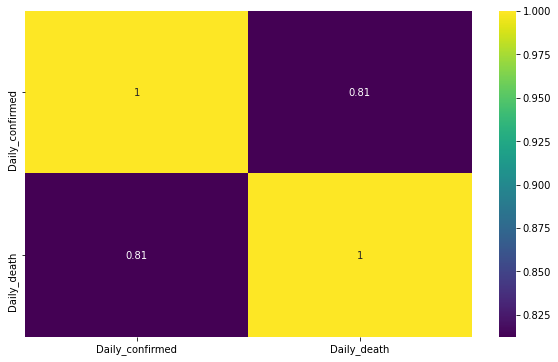

In [45]:
# plot the heatmap to check for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(Covid_merg.corr(), annot=True, cmap='viridis')

In [46]:
Covid_merg.shape #covid_confirmed_melt.plot()

(157, 2)

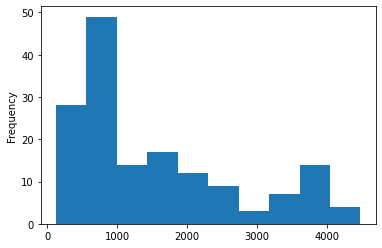

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



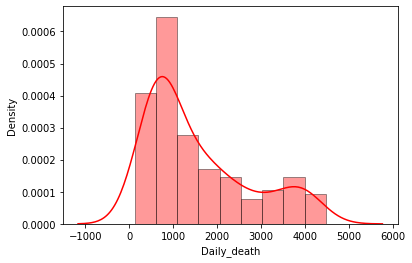

In [47]:
#histogram
Covid_merg['Daily_death'].plot.hist()
plt.show()
#density plot
sns.distplot(a=Covid_merg.Daily_death, color='red', hist_kws={"edgecolor":'black'})
plt.show()

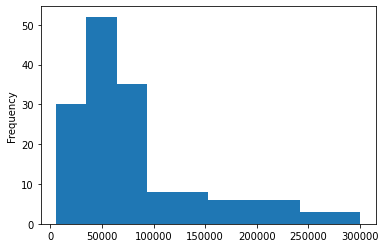

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



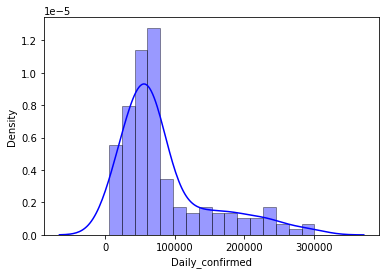

In [95]:
#histogram
Covid_merg['Daily_confirmed'].plot.hist()
plt.show()
# density plot
sns.distplot(a=Covid_merg.Daily_confirmed, color='blue', hist_kws={"edgecolor":'black'})
plt.show()


In [96]:
Covid_merg['Daily_death'].describe()

count     157.000000
mean     1551.108280
std      1180.441256
min       126.000000
25%       683.000000
50%      1023.000000
75%      2107.000000
max      4477.000000
Name: Daily_death, dtype: float64

In [97]:
Covid_merg['Daily_confirmed'].describe()

count       157.000000
mean      83591.949045
std       65013.092013
min        5395.000000
25%       43220.000000
50%       62498.000000
75%       95250.000000
max      300462.000000
Name: Daily_confirmed, dtype: float64

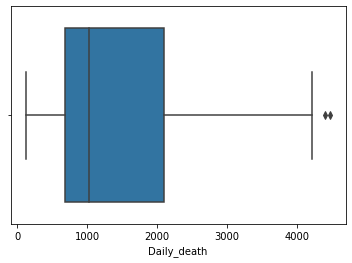

In [98]:
# plot the boxplot to check for outlier
sns.boxplot(x= Covid_merg.Daily_death)

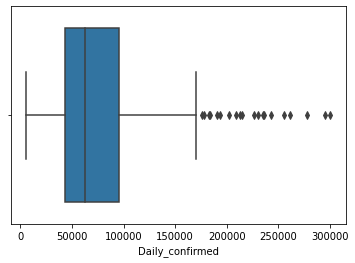

In [99]:
sns.boxplot(x= Covid_merg.Daily_confirmed)

***#checking stationarity with  ADF (Augmented Dickey Fuller Statistical ) test***

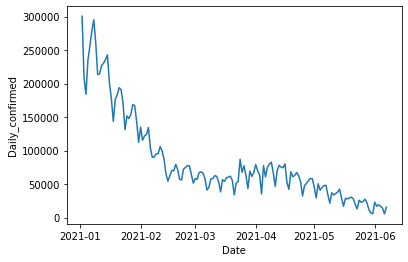

In [100]:
#plot graph (Daily confirmed cases)
plt.xlabel('Date')
plt.ylabel('Daily_confirmed')
plt.plot(Covid_merg.Daily_confirmed)

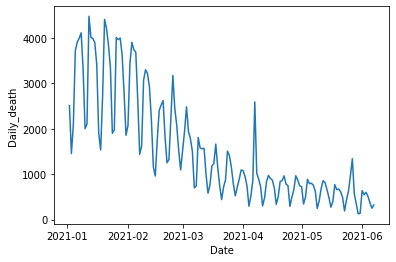

In [101]:
#plot graph (Daily death cases)
plt.xlabel('Date')
plt.ylabel('Daily_death')
plt.plot(Covid_merg.Daily_death)

In [48]:
from statsmodels.tsa.stattools import adfuller

In [50]:
# Ho: Null hypothesis " time series is non stationary"
# H1 time series is stationary 
def adfuller_test(Covid_merg):
  result = adfuller(Covid_merg)
  labels = ['ADF Test statistic','p-value', '#Lags Used','Number of Observations used for ADF']
  for value, label in zip(result, labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
      print('strong evidence against the null hypothesis(Ho), reject Ho: the data does not have a unit root and is stationary ')
  else:
      print ('weak evidence against the null hypothesis(Ho), fail to reject Ho: the data has a root and is non stationary')


In [51]:
#check stationarity for Daily confirmed cases
adfuller_test(Covid_merg['Daily_confirmed'])

ADF Test statistic : -2.553206316787137
p-value : 0.10305928414333443
#Lags Used : 14
Number of Observations used for ADF : 142
weak evidence against the null hypothesis(Ho), fail to reject Ho: the data has a root and is non stationary


In [52]:
#check stationarity for Daily death cases
adfuller_test(Covid_merg['Daily_death'])

ADF Test statistic : -2.0481070303643145
p-value : 0.26588602204047895
#Lags Used : 13
Number of Observations used for ADF : 143
weak evidence against the null hypothesis(Ho), fail to reject Ho: the data has a root and is non stationary


# Model analysis Daily confirmed cases

1) Apply transformation to penalize higher values more than smaller values

In [54]:
# Daily confirmed
Covid_daily_conf = Covid_merg.drop(columns=['Daily_death'])
Covid_daily_conf

,Daily_confirmed
Date,
2021-01-02,300462.0
2021-01-03,208853.0
2021-01-04,184005.0
2021-01-05,235042.0
2021-01-06,255637.0
...,...
2021-06-03,19074.0
2021-06-04,16860.0
2021-06-05,13908.0


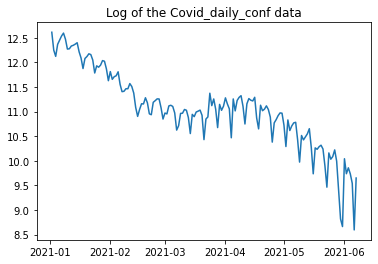

In [55]:
# Log Transformation
ts_log = np.log(Covid_daily_conf)
plt.title('Log of the Covid_daily_conf data')
plt.plot(ts_log)
plt.show()

In [58]:
adfuller_test(ts_log.dropna())

ADF Test statistic : -0.6166606756495495
p-value : 0.8671727825599171
#Lags Used : 14
Number of Observations used for ADF : 142
weak evidence against the null hypothesis(Ho), fail to reject Ho: the data has a root and is non stationary


In [60]:
# First difference
ts_log_diff_1 = ts_log - ts_log.shift()
ts_log_diff_1


,Daily_confirmed
Date,
2021-01-02,NaN
2021-01-03,-0.363691
2021-01-04,-0.126668
2021-01-05,0.244801
2021-01-06,0.083994
...,...
2021-06-03,0.120244
2021-06-04,-0.123382
2021-06-05,-0.192480


In [61]:
# test for stationarity
adfuller_test(ts_log_diff_1.dropna())

ADF Test statistic : -1.8147867574913836
p-value : 0.3731455829197018
#Lags Used : 14
Number of Observations used for ADF : 141
weak evidence against the null hypothesis(Ho), fail to reject Ho: the data has a root and is non stationary


In [71]:
#2nd difference
ts_log_diff_2 = ts_log_diff_1 - ts_log_diff_1.shift()
ts_log_diff_2

,Daily_confirmed
Date,
2021-01-02,NaN
2021-01-03,NaN
2021-01-04,0.237023
2021-01-05,0.371469
2021-01-06,-0.160807
...,...
2021-06-03,0.425174
2021-06-04,-0.243626
2021-06-05,-0.069098


In [72]:
 ts_log_diff_2 = ts_log_diff_2.dropna()

In [73]:
# test for stationarity
adfuller_test(ts_log_diff_2)

ADF Test statistic : -7.365277986495487
p-value : 9.271441446331528e-11
#Lags Used : 13
Number of Observations used for ADF : 141
strong evidence against the null hypothesis(Ho), reject Ho: the data does not have a unit root and is stationary 


**Decomposition**

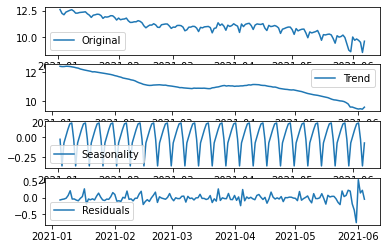

<Figure size 432x288 with 0 Axes>

In [64]:
# Check the component of the timeseries data
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()
plt.tight_layout()

In [66]:
# After decomposition,The trend andseasonality are separated out from data and we can model the residuals(irregularity that is present in the data)
#check for seasonality
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
adfuller_test(ts_log_decompose)

ADF Test statistic : -7.070567575872909
p-value : 4.94973377208319e-10
#Lags Used : 12
Number of Observations used for ADF : 138
strong evidence against the null hypothesis(Ho), reject Ho: the data does not have a unit root and is stationary 


In [76]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
%matplotlib inline

In [77]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

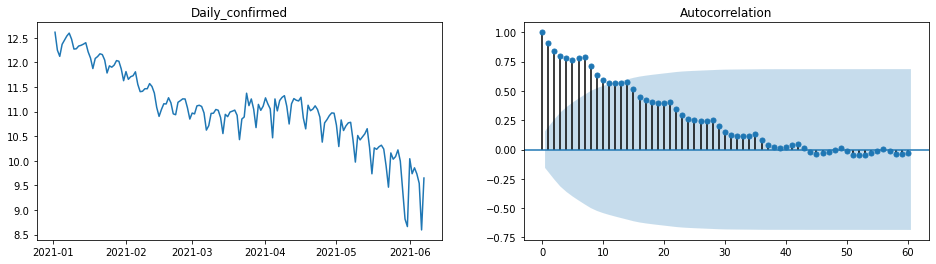

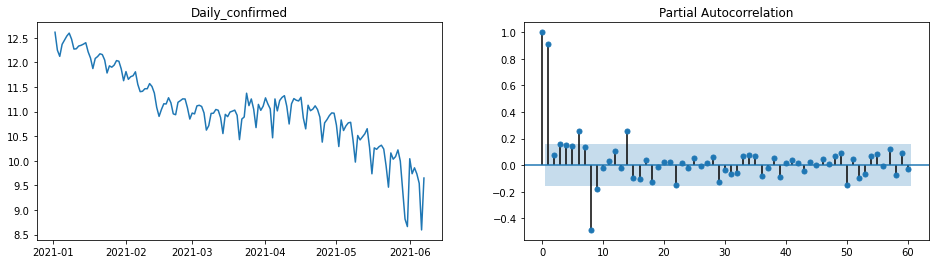

In [68]:
# acf and pcf for the original data( before differencing)
#acf
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(ts_log.Daily_confirmed)
ax1.set_title("Daily_confirmed")
plot_acf(ts_log.Daily_confirmed, lags=60, ax=ax2)
plt.show()
#pacf
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(ts_log.Daily_confirmed)
ax1.set_title("Daily_confirmed")
plot_pacf(ts_log.Daily_confirmed, lags=60, ax=ax2)
plt.show()

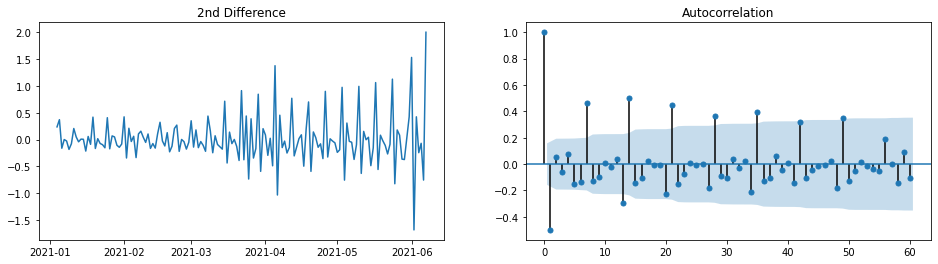

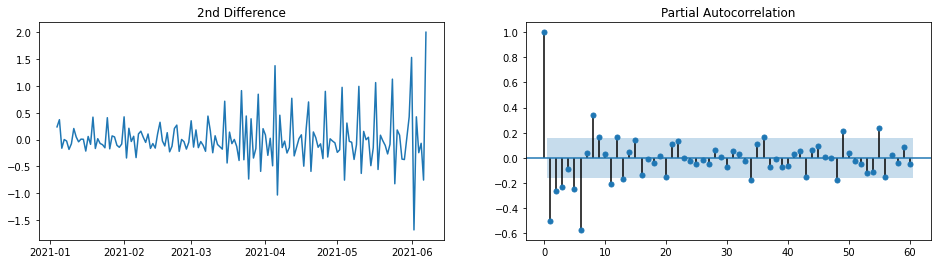

In [78]:
#acf and pcf after the differencing
#acf
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(ts_log_diff_2)
ax1.set_title("2nd Difference")
plot_acf(ts_log_diff_2, lags=60, ax=ax2)
plt.show()
#pacf
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(ts_log_diff_2)
ax1.set_title("2nd Difference")
plot_pacf(ts_log_diff_2, lags=60, ax=ax2)
plt.show()

In [75]:
# we used ndiffs to have the number for Daily_confirmed
ndiffs(ts_log, test="adf")
# d= 1  (number of differencing require to make the series stationary)

1

In [80]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [117]:
# Impliment Autoarima to check p,d,q value
model_auto = auto_arima((ts_log), trace =True, suppress_warnings=True)
model_auto.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1.372, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=58.248, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=50.995, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31.748, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=56.927, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22.107, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19.768, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-22.195, Time=0.59 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11.184, Time=0.26 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-38.631, Time=0.72 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3.606, Time=0.36 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-65.934, Time=0.82 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-22.156, Time=0.49 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-63.973, Time=0.88 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(5, 1, 2)   Log Likelihood                  41.967
Date:                Fri, 09 Jul 2021   AIC                            -65.934
Time:                        23:22:47   BIC                            -38.486
Sample:                             0   HQIC                           -54.786
                                - 157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0513      0.021     -2.466      0.014      -0.092      -0.011
ar.L1          0.0924      0.094      0.980      0.327      -0.092       0.277
ar.L2         -0.5771      0.103     -5.622      0.000      -0.778      -0.376
ar.L3         -0.4396      0.127     -3.464      0.001      -0.688      -0.191
ar.L4         -0.3308      0.123     -2.684      0.007      -0.572      -0.089
ar.L5         -0.5226      0.094     -5.536      0.000      -0.708      -0.338
ma.L1         -0.9170      0.100     -9.125      0.000      -1.114      -0.720
ma.L2          0.7773      0.091      8.538      0.000       0.599       0.956
sigma2         0.0328      0.003     12.364      0.000       0.028       0.038
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               192.06
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               6.15   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From auto_arima, the p, d, q with minimize AIC score is order=(5,1,2)

In [87]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

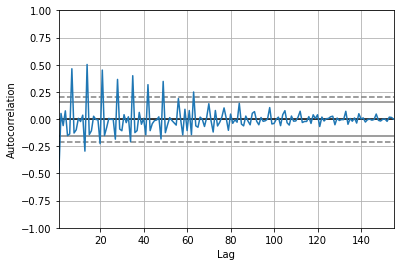

In [183]:
# Arima
#Autocorrelation analysis
autocorrelation_plot(ts_log_diff_2)
pyplot.show()

In [190]:
#cross validation
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 3)
rmse = []
mse = []
mae = []
for train_index, test_index in tscv.split(ts_log_diff_2):
    cv_train, cv_test = ts_log_diff_2.iloc[train_index], ts_log_diff_2.iloc[test_index]
    model = ARIMA(cv_train, order = (5,1,2) ).fit()
    predictions = model.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test
    rmse.append(np.sqrt(mean_squared_error(true_values, predictions)))
    mse.append(mean_squared_error(true_values, predictions))
    mae.append(mean_absolute_error(true_values, predictions))
print("RMSE: {}".format(rmse))
print( f"MSE: {mse}")
print( f"MAE: {mae}")
print("RMSE: {}".format(np.mean(rmse)))
print( f"MSE: {np.mean(mse)}")
print( f"MAE: {np.mean(mae)}")

RMSE: [0.2887025774985044, 0.504206039553984, 0.7129064673649149]
MSE: [0.08334917825427994, 0.25422373032271367, 0.5082356312107225]
MAE: [0.2235855483233747, 0.3681009134167612, 0.5022209771661362]
RMSE: 0.5019383614724678
MSE: 0.2819361799292387
MAE: 0.3646358129687574


Support vector machine

In [186]:
#splitting the data
Covid_daily_conf['Date'] = Covid_daily_conf.index-Covid_daily_conf.index[0]
Covid_daily_conf['Date'] = Covid_daily_conf['Date'].dt.days
train_m=Covid_daily_conf.iloc[:int(Covid_daily_conf.shape[0]*0.80)]
valid_m=Covid_daily_conf.iloc[int(Covid_daily_conf.shape[0]*0.80):]

In [187]:
train_m

,Daily_confirmed,Date
Date,,
2021-01-02,300462.0,0
2021-01-03,208853.0,1
2021-01-04,184005.0,2
2021-01-05,235042.0,3
2021-01-06,255637.0,4
...,...,...
2021-05-02,29404.0,120
2021-05-03,50492.0,121
2021-05-04,40716.0,122


In [188]:
#support Vector machine
#Intializing SVR Model
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.001)
rmse = []
mse = []
mae = []
svm.fit(np.array(train_m["Date"]).reshape(-1,1), np.array(train_m['Daily_confirmed']).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid_m["Date"]).reshape(-1,1))
rmse.append(np.sqrt(mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_svm)))
mse.append(mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_svm))
mae.append(mean_absolute_error(valid_m["Daily_confirmed"],prediction_valid_svm))
print("RMSE: ",np.sqrt(mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_svm)))
print("MSE: ", (mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_svm)))
print("MAE: ", (mean_absolute_error(valid_m["Daily_confirmed"],prediction_valid_svm)))

RMSE:  60031.89965086421
MSE:  3603828975.69143
MAE:  49309.401993348205


In [189]:
#Linear regression
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(np.array(train_m["Date"]).reshape(-1,1), np.array(train_m['Daily_confirmed']).reshape(-1,1))
prediction_valid_lin_reg= lin_reg.predict(np.array(valid_m["Date"]).reshape(-1,1))
rmse.append(np.sqrt(mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_lin_reg)))
mse.append(mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_lin_reg))
mae.append(mean_absolute_error(valid_m["Daily_confirmed"],prediction_valid_lin_reg))
print("RMSE: ",np.sqrt(mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_lin_reg)))
print("MSE: ", (mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_lin_reg)))
print("MAE: ", (mean_absolute_error(valid_m["Daily_confirmed"],prediction_valid_lin_reg)))

RMSE:  37642.34114543902
MSE:  1416945846.9096117
MAE:  36731.526493471596


Support Vector machine

In [193]:
Covid_daily_ML =Covid_daily_conf.drop(columns=['Date'])
Covid_daily_ML

,Daily_confirmed
Date,
2021-01-02,300462.0
2021-01-03,208853.0
2021-01-04,184005.0
2021-01-05,235042.0
2021-01-06,255637.0
...,...
2021-06-03,19074.0
2021-06-04,16860.0
2021-06-05,13908.0


In [222]:
#convert the timeseries to supervise machine learning
Covid_daily_ML['1_daybefor'] = Covid_daily_ML['Daily_confirmed'].shift(+1)
Covid_daily_ML['2_daybefor'] = Covid_daily_ML['Daily_confirmed'].shift(+2)
Covid_daily_ML['3_daybefor'] = Covid_daily_ML['Daily_confirmed'].shift(+3)
Covid_daily_ML

,Daily_confirmed,1_daybefor,2_daybefor,3_daybefor
Date,,,,
2021-01-04,184005.0,NaN,NaN,NaN
2021-01-05,235042.0,184005.0,NaN,NaN
2021-01-06,255637.0,235042.0,184005.0,NaN
2021-01-07,278337.0,255637.0,235042.0,184005.0
2021-01-08,295257.0,278337.0,255637.0,235042.0
...,...,...,...,...
2021-06-03,19074.0,16913.0,22943.0,5776.0
2021-06-04,16860.0,19074.0,16913.0,22943.0
2021-06-05,13908.0,16860.0,19074.0,16913.0


In [223]:
Covid_daily_ML = Covid_daily_ML.dropna()
Covid_daily_ML

,Daily_confirmed,1_daybefor,2_daybefor,3_daybefor
Date,,,,
2021-01-07,278337.0,255637.0,235042.0,184005.0
2021-01-08,295257.0,278337.0,255637.0,235042.0
2021-01-09,260967.0,295257.0,278337.0,255637.0
2021-01-10,213415.0,260967.0,295257.0,278337.0
2021-01-11,214664.0,213415.0,260967.0,295257.0
...,...,...,...,...
2021-06-03,19074.0,16913.0,22943.0,5776.0
2021-06-04,16860.0,19074.0,16913.0,22943.0
2021-06-05,13908.0,16860.0,19074.0,16913.0


Linear regression

In [225]:
# input value "1_daybefor"	"2_daybefor" will be use to predict daily confirmed cases
x1, x2, x3,y= Covid_daily_ML['1_daybefor'],Covid_daily_ML['2_daybefor'],Covid_daily_ML['3_daybefor'],Covid_daily_ML['Daily_confirmed']
x1,x2, x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2, x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3),axis=1)


In [226]:
final_x

array([[255637., 235042., 184005.],
       [278337., 255637., 235042.],
       [295257., 278337., 255637.],
       [260967., 295257., 278337.],
       [213415., 260967., 295257.],
       [214664., 213415., 260967.],
       [226967., 214664., 213415.],
       [230301., 226967., 214664.],
       [235766., 230301., 226967.],
       [242780., 235766., 230301.],
       [201858., 242780., 235766.],
       [177931., 201858., 242780.],
       [143598., 177931., 201858.],
       [176216., 143598., 177931.],
       [183261., 176216., 143598.],
       [193856., 183261., 176216.],
       [190760., 193856., 183261.],
       [170759., 190760., 193856.],
       [131198., 170759., 190760.],
       [151677., 131198., 170759.],
       [147626., 151677., 131198.],
       [153961., 147626., 151677.],
       [168804., 153961., 147626.],
       [166613., 168804., 153961.],
       [142459., 166613., 168804.],
       [112152., 142459., 166613.],
       [134975., 112152., 142459.],
       [115303., 134975., 11

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = final_x[:-20],final_x[-20:],y[:-20],y[-20:]

In [238]:
lin_model=LinearRegression()

In [239]:
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [241]:
lin_pred = lin_model.predict(X_test)
rmse = math.sqrt(mean_squared_error(lin_pred,y_test))
print('RMSE:', rmse)

RMSE: 7320.010372155019
